### Análise e Representacão dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
sns.set_theme(style = 'whitegrid')

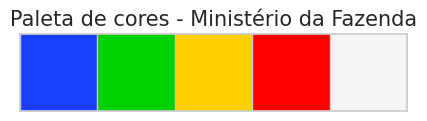

In [4]:
# Paleta de cores para storytelling de dados

pallette = ['#183FFE', '#00D100', '#FFD000','#FE0002', '#f5f5f5']
sns.palplot(pallette)
plt.title('Paleta de cores - Ministério da Fazenda', loc = 'center', fontsize = 15, y = 1);

In [5]:
concession = pd.read_csv('/home/cristoshie/Public/projects/storytelling/database/concession.csv')
concession.head()

,Interessado,UF,Tipo_de_interessado,Tipo_de_operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Número_do_Processo/PVL,Código_IBGE,Status,Data,Analisado_por,Regiao
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN,Sudeste
3,Abaeté,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"950,000.00",17944.001370/2013-30,"3,100,203.00",Deferido,2013-11-12,STN,Sudeste
4,Abaeté,MG,Município,Operação Contratual Interna,Provias,Instituição Financeira Nacional,Banco do Brasil S/A,Real,"825,000.00",17944.002020/2006-61,"3,100,203.00",Deferido,2007-06-18,STN,Sudeste


In [6]:
concession.Data = pd.to_datetime(concession.Data)

In [7]:
loan = concession.groupby(by = concession.Data.dt.year).agg(Sum_ = ('Valor', 'sum')).tail(8)/10**9

In [8]:
loan

,Sum_
Data,
2017,251.17
2018,18.32
2019,10.80
2020,75.88
2021,7.51
2022,12.63
2023,14.63
2024,3.05


#### Storytelling com Gráfico de barras

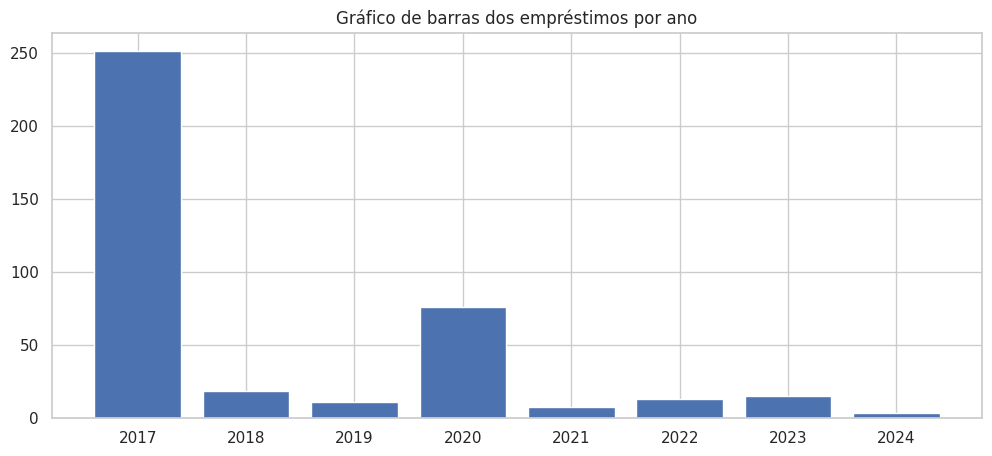

In [9]:
plt.figure(figsize = (12,5))
plt.title('Gráfico de barras dos empréstimos por ano')
plt.bar(loan.index, loan.Sum_);

In [10]:
# remover bordas do gráfico
def clean_spines():
    for loop in ['top', 'left', 'right', 'bottom']:
        ax.spines[loop].set_visible(False)

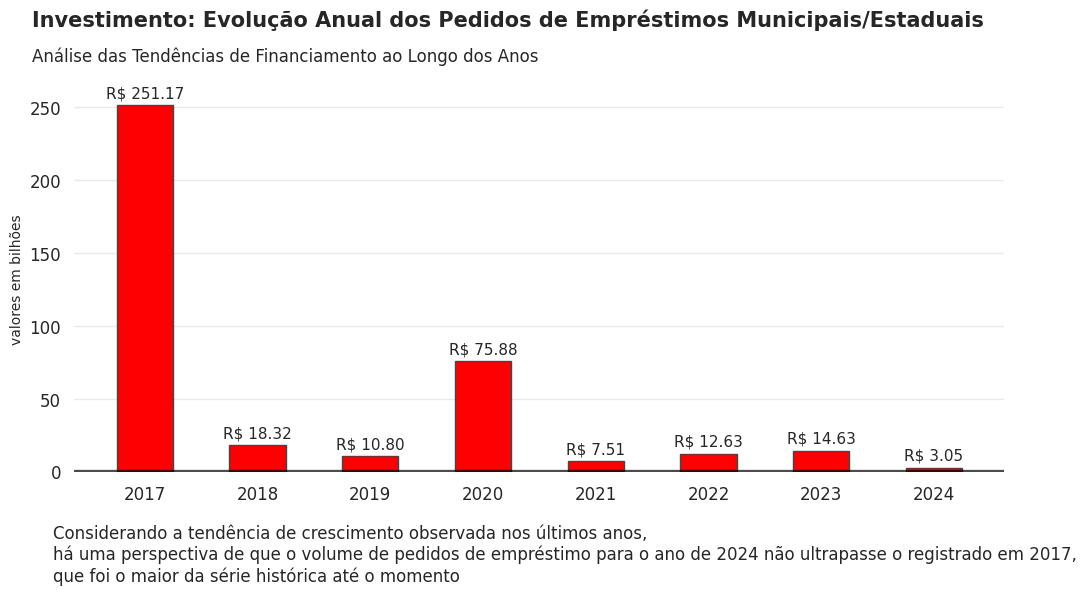

In [11]:
# tamanho da figura
fig, ax = plt.subplots(figsize=(12,5))

# titulo e subtitulo
fig.text(0.09, 1, 
         "Investimento: Evolução Anual dos Pedidos de Empréstimos Municipais/Estaduais", 
         fontsize = 15,
         fontweight = 'bold')
fig.text(0.09, 0.93, 
         "Análise das Tendências de Financiamento ao Longo dos Anos",
         fontsize = 12)
bars = ax.bar(loan.index, loan.Sum_, 
              width = 0.5, 
              edgecolor = 'darkslategrey', 
              linewidth = 1, 
              color = pallette[3])

clean_spines()

# mostrar linha horizontal no eixo y=0
ax.axhline(y = 0, color = 'black', linewidth = 3.1, alpha = 0.7)

# configurar grid somente no eixo y
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
ax.grid(axis = 'x', alpha = 0)

ax.set_ylabel('valores em bilhões', size = 10)

# configura tamanho das marcas dos eixos
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

# adiciona valores em cima da barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        'R$ {:,.2f}'.format(height),
        xy = (bar.get_x() + bar.get_width()/2, height), # posicionando no centro
        xytext = (0, 3), # deslocamento vertical e horizontal da anotação
        textcoords = "offset points",
        ha = 'center', va = 'bottom', # alinhamento vertical e horizontal
        fontsize = 11,
        fontweight = "light"
    )

fig.text(
    0.09, -0.15,
    '''
    Considerando a tendência de crescimento observada nos últimos anos,
    há uma perspectiva de que o volume de pedidos de empréstimo para o ano de 2024 não ultrapasse o registrado em 2017,
    que foi o maior da série histórica até o momento
    ''',
    fontsize = 12)

plt.savefig('analise_anual.png', dpi = 250, bbox_inches = 'tight');
        